In [5]:
! pip install numpy
! pip install pandas
! pip install matplotlip
! pip install seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [7]:
# df = pd.read_csv('titanic3.csv')

# df.columns = ['PassengerId' + col for col in df.columns]

# df.insert(0, 'PassengerId', range(1, 1 + len(df)))

# df.to_csv('titanic.csv', index=False)

In [8]:
dtype = np.dtype([
    ('pclass', int),
    ('survived', int),
    ('name', 'U50'),
    ('sex', 'U10'),
    ('age', float),
    ('sibsp', int),
    ('parch', int),
    ('ticket', 'U20'),
    ('fare', float),
    ('cabin', 'U20'),
    ('embarked', 'U1'),
    ('boat', 'U10'),
    ('body', float),
    ('home_dest', 'U50')
])

In [9]:
def data_structuring():
    data = []
    with open('titanic3.csv', 'r') as file:
        read = csv.reader(file)
        next(read)
        for row in read:
            try:
                cleaned_row = [col if col else '0' for col in row]
                data.append(tuple(cleaned_row))
            except ValueError as e:
                print(f"Error processing row: {row}, Error: {e}")
    structured_data = np.array(data, dtype=dtype)
    return structured_data

In [10]:
arr = data_structuring()
arr

array([(1, 1, 'Allen, Miss. Elisabeth Walton', 'female', 29.    , 0, 0, '24160', 211.3375, 'B5', 'S', '2', 0., 'St Louis, MO'),
       (1, 1, 'Allison, Master. Hudson Trevor', 'male',  0.9167, 1, 2, '113781', 151.55  , 'C22 C26', 'S', '11', 0., 'Montreal, PQ / Chesterville, ON'),
       (1, 0, 'Allison, Miss. Helen Loraine', 'female',  2.    , 1, 2, '113781', 151.55  , 'C22 C26', 'S', '0', 0., 'Montreal, PQ / Chesterville, ON'),
       ...,
       (3, 0, 'Zakarian, Mr. Ortin', 'male', 27.    , 0, 0, '2670',   7.225 , '0', 'C', '0', 0., '0'),
       (3, 0, 'Zimmerman, Mr. Leo', 'male', 29.    , 0, 0, '315082',   7.875 , '0', 'S', '0', 0., '0'),
       (0, 0, '0', '0',  0.    , 0, 0, '0',   0.    , '0', '0', '0', 0., '0')],
      dtype=[('pclass', '<i8'), ('survived', '<i8'), ('name', '<U50'), ('sex', '<U10'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'), ('ticket', '<U20'), ('fare', '<f8'), ('cabin', '<U20'), ('embarked', '<U1'), ('boat', '<U10'), ('body', '<f8'), ('home_dest', '<

In [11]:
def overall_survival_rate(arr):
    survived_count = arr['survived'].sum()
    total_passengers = arr['survived'].shape
    survival_rate = (survived_count / total_passengers) * 100
    return survival_rate

def survival_by_class(df):
    survival_by_class = df.groupby('pclass')['survived'].mean() * 100
    return survival_by_class

def survival_by_gender(df):
    survival_by_gender = df.groupby('sex')['survived'].mean() * 100
    return survival_by_gender

def survival_by_age_group(df, bins=[0, 18, 30, 50, 100]):
    df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=['0-18', '19-30', '31-50', '51+'])
    survival_by_age_group = df.groupby('aAgeGroup')['survived'].mean() * 100
    return survival_by_age_group

def survival_by_family_size(df):
    df['FamilySize'] = df['sibsp'] + df['parch'] + 1
    survival_by_family_size = df.groupby('FamilySize')['survived'].mean() * 100
    return survival_by_family_size

In [12]:
def passenger_count_by_class(df):
    passenger_count_by_class = df['Pclass'].value_counts().sort_index()
    return passenger_count_by_class

def gender_distribution(df):
    gender_distribution = df['Sex'].value_counts()
    return gender_distribution

def age_distribution(df):
    age_distribution = df['Age'].plot(kind='hist', bins=20, edgecolor='black')
    plt.xlabel('Age')
    plt.title('Age Distribution of Passengers')
    plt.show()

def embarkation_port_analysis(df):
    embarkation_port_counts = df['Embarked'].value_counts()
    return embarkation_port_counts

In [13]:
def ticket_fare_distribution(df):
    fare_distribution = df['Fare'].plot(kind='hist', bins=20, edgecolor='black')
    plt.xlabel('Fare')
    plt.title('Ticket Fare Distribution')
    plt.show()

def average_fare_by_class(df):
    average_fare_by_class = df.groupby('Pclass')['Fare'].mean()
    return average_fare_by_class

def fare_vs_survival(df):
    fare_vs_survival = sns.boxplot(x='Survived', y='Fare', data=df)
    plt.title('Fare vs. Survival')
    plt.show()

In [14]:
def passenger_demographics_by_class(df):
    class_demographics = df.groupby('Pclass').agg({'Age': 'mean', 'Sex': 'value_counts'})
    return class_demographics

def survival_rates_by_class_and_gender(df):
    survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100
    return survival_rates

def fare_analysis_by_class(df):
    fare_analysis = sns.boxplot(x='Pclass', y='Fare', data=df)
    plt.title('Fare Analysis by Class')
    plt.show()

In [15]:
def family_relationships_and_survival(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    family_survival = df.groupby('FamilySize')['Survived'].mean() * 100
    return family_survival

In [16]:
df = pd.read_csv('titanic3.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [17]:
overall_survival_rate(arr)


array([38.16793893])

In [18]:
survival_by_class(df)

pclass
1.0    61.919505
2.0    42.960289
3.0    25.528914
Name: survived, dtype: float64

In [19]:
survival_by_family_size(df)

FamilySize
1.0     30.253165
2.0     53.617021
3.0     56.603774
4.0     69.767442
5.0     27.272727
6.0     20.000000
7.0     25.000000
8.0      0.000000
11.0     0.000000
Name: survived, dtype: float64

In [20]:
def survival_rate_by_category(data, category_col):
    categories = data[category_col].unique()
    survival_rates = []
    for category in categories:
        total_passengers = len(data[data[category_col] == category])
        if total_passengers == 0:
            continue
        survived_passengers = len(data[(data[category_col] == category) & (data['survived'] == 1)])
        survival_rate = survived_passengers / total_passengers
        survival_rates.append((category, survival_rate))
    return survival_rates

In [21]:
# survival_rates_sex = survival_rate_by_category(arr, 'sex')
# survival_rates_sex

In [22]:
survival_rate_by_class = survival_rate_by_category(df, 'pclass')
survival_rate_by_class

[(np.float64(1.0), 0.6191950464396285),
 (np.float64(2.0), 0.4296028880866426),
 (np.float64(3.0), 0.2552891396332863)]

In [23]:
def plot_survival_rate(data, category_col):
    survival_rates = survival_rate_by_category(data, category_col)
    categories, rates = zip(*survival_rates)
    plt.figure(figsize=(8, 5))
    plt.bar(categories, rates, color='skyblue')
    plt.xlabel(category_col.capitalize())
    plt.ylabel('Survival Rate')
    plt.title(f'Survival Rates by {category_col.capitalize()}')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

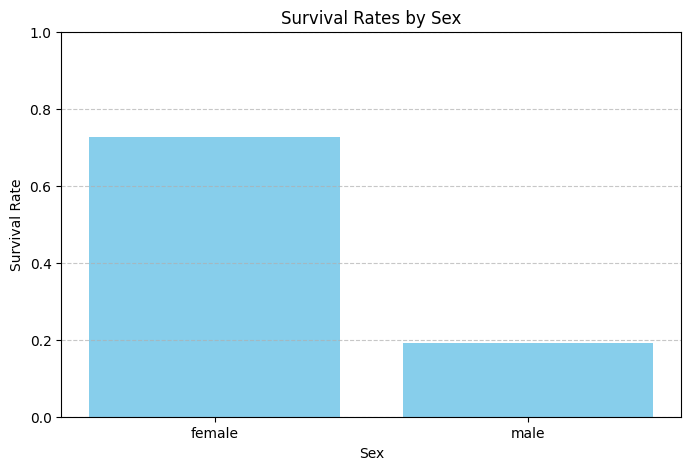

In [24]:
plot_survival_rate(df, 'sex')

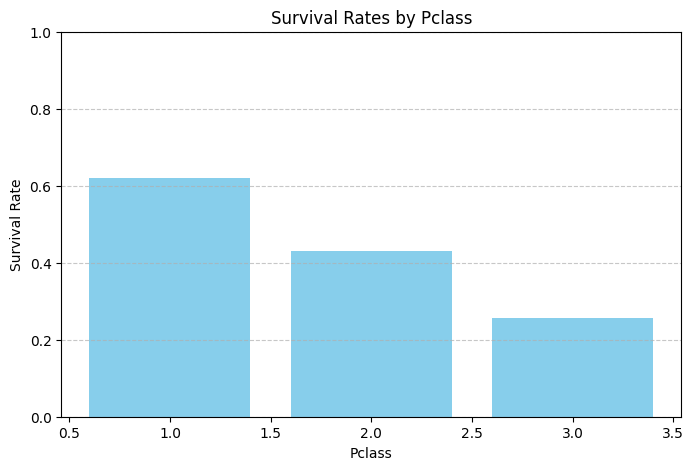

In [25]:
plot_survival_rate(df, 'pclass')

In [26]:
from typing import Dict, List, Tuple


class Survival_Controller:

    @staticmethod
    def overall_survival_rate(arr: np.ndarray) -> float:
        survived_count = np.sum(arr['survived'])
        total_passengers = len(arr)
        survival_rate = (survived_count / total_passengers) * 100
        return float(survival_rate)

    @staticmethod
    def survival_by_class(arr: np.ndarray) -> Dict[int, float]:
        pclasses = np.unique(arr['pclass'])
        survival_by_class: Dict[int, float] = {}
        for pclass in pclasses:
            mask = arr['pclass'] == pclass
            survival_rate = np.mean(arr['survived'][mask]) * 100
            survival_by_class[int(pclass)] = float(survival_rate)
        return survival_by_class

    @staticmethod
    def survival_by_gender(arr: np.ndarray) -> Dict[str, float]:
        genders = np.unique(arr['sex'])
        survival_by_gender: Dict[str, float] = {}
        for gender in genders:
            mask = arr['sex'] == gender
            survival_rate = np.mean(arr['survived'][mask]) * 100
            survival_by_gender[str(gender)] = float(survival_rate)
        return survival_by_gender

    @staticmethod
    def survival_by_age_group(arr: np.ndarray, bins: List[int] = [0, 18, 30, 50, 100]) -> Dict[str, float]:
        age_groups = ['0-18', '19-30', '31-50', '51+']
        age_labels = np.digitize(arr['age'], bins=bins, right=True)
        survival_by_age_group: Dict[str, float] = {}
        for i, label in enumerate(age_labels):
            group_name = age_groups[label - 1]
            if group_name not in survival_by_age_group:
                survival_by_age_group[group_name] = []
            survival_by_age_group[group_name].append(arr['survived'][i])
        
        for group, survivals in survival_by_age_group.items():
            survival_by_age_group[group] = float(np.mean(survivals) * 100)
        
        return survival_by_age_group

    @staticmethod
    def survival_by_family_size(arr: np.ndarray) -> Dict[int, float]:
        family_sizes = np.array(arr['sibsp'] + arr['parch'] + 1)
        unique_sizes = np.unique(family_sizes)
        survival_by_family_size: Dict[int, float] = {}
        for size in unique_sizes:
            mask = family_sizes == size
            survival_rate = np.mean(arr['survived'][mask]) * 100
            survival_by_family_size[int(size)] = float(survival_rate)
        return survival_by_family_size


In [27]:
data = arr
controller = Survival_Controller()

print("Overall survival rate:", controller.overall_survival_rate(data))
print("Survival by class:", controller.survival_by_class(data))
print("Survival by gender:", controller.survival_by_gender(data))
print("Survival by age group:", controller.survival_by_age_group(data))
print("Survival by family size:", controller.survival_by_family_size(data))


Overall survival rate: 38.16793893129771
Survival by class: {0: 0.0, 1: 61.91950464396285, 2: 42.96028880866426, 3: 25.52891396332863}
Survival by gender: {'0': 0.0, 'female': 72.74678111587983, 'male': 19.098457888493474}
Survival by age group: {'19-30': 36.77884615384615, '0-18': 49.22279792746114, '31-50': 41.228070175438596, '51+': 30.919220055710305}
Survival by family size: {1: 30.214917825537295, 2: 53.61702127659574, 3: 56.60377358490566, 4: 69.76744186046511, 5: 27.27272727272727, 6: 20.0, 7: 25.0, 8: 0.0, 11: 0.0}


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict


class Financial_Controller:

    @staticmethod
    def ticket_fare_distribution(arr: np.ndarray) -> None:
        plt.hist(arr['fare'], bins=20, edgecolor='black')
        plt.xlabel('Fare')
        plt.title('Ticket Fare Distribution')
        plt.show()

    @staticmethod
    def average_fare_by_class(arr: np.ndarray) -> Dict[int, float]:
        pclasses = np.unique(arr['pclass'])
        average_fare_by_class: Dict[int, float] = {}
        for pclass in pclasses:
            mask = arr['pclass'] == pclass
            average_fare = np.mean(arr['fare'][mask])
            average_fare_by_class[int(pclass)] = float(average_fare)
        return average_fare_by_class

    @staticmethod
    def fare_vs_survival(arr: np.ndarray) -> None:
        sns.boxplot(x=arr['survived'], y=arr['fare'])
        plt.title('Fare vs. Survival')
        plt.show()


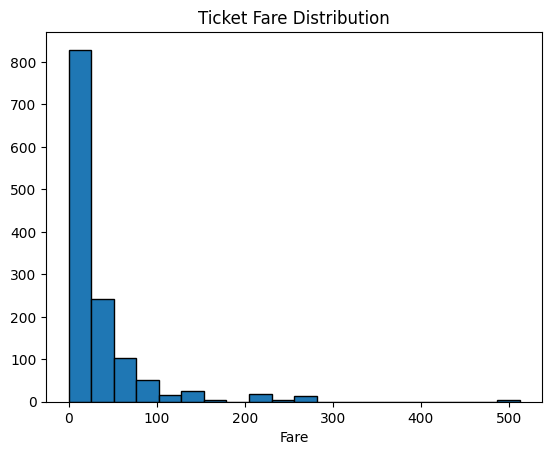

Average fare by class: {0: 0.0, 1: 87.50899164086688, 2: 21.179196389891697, 3: 13.284125811001411}


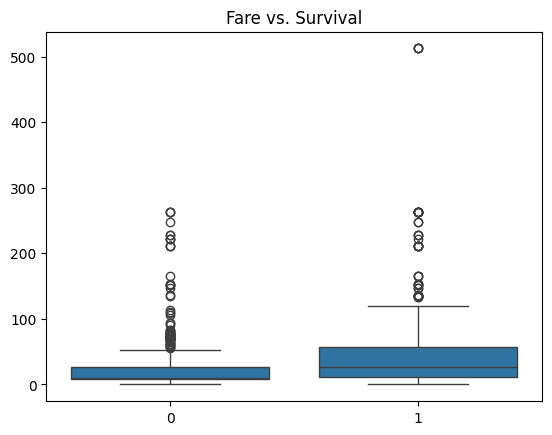

In [29]:
controller = Financial_Controller()


controller.ticket_fare_distribution(data)
print("Average fare by class:", controller.average_fare_by_class(data))
controller.fare_vs_survival(data)


In [30]:
import numpy as np

In [31]:
from typing import Dict

class Demographic_Controller:

    def __init__(self):
        pass

    def passenger_count_by_class(self, arr: np.ndarray) -> Dict[int, int]:
        class_counts = np.bincount(arr['pclass'])
        passenger_count_by_class: Dict[int, int] = {}
        for pclass in np.unique(arr['pclass']):
            passenger_count_by_class[int(pclass)] = int(class_counts[pclass])
        return passenger_count_by_class

    def gender_distribution(self, arr: np.ndarray) -> Dict[str, int]:
        gender_counts = dict(zip(*np.unique(arr['sex'], return_counts=True)))
        return gender_counts

    def age_distribution(self, arr: np.ndarray) -> None:
        plt.hist(arr['age'], bins=20, edgecolor='black')
        plt.xlabel('Age')
        plt.title('Age Distribution of Passengers')
        plt.show()

    def embarkation_port_analysis(self, arr: np.ndarray) -> Dict[str, int]:
        embarkation_port_counts = dict(zip(*np.unique(arr['embarked'], return_counts=True)))
        return embarkation_port_counts


Passenger count by class: {0: 1, 1: 323, 2: 277, 3: 709}
Gender distribution: {np.str_('0'): np.int64(1), np.str_('female'): np.int64(466), np.str_('male'): np.int64(843)}


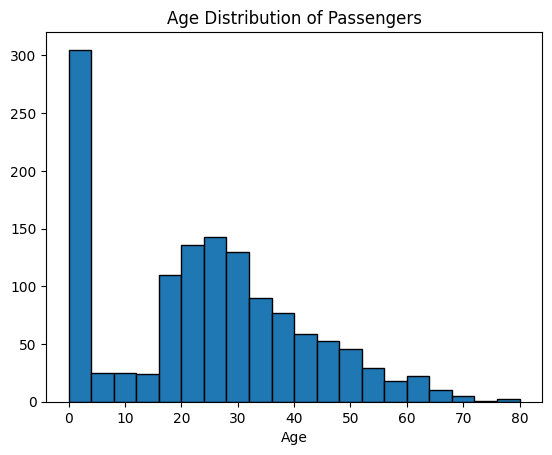

Embarkation port analysis: {np.str_('0'): np.int64(3), np.str_('C'): np.int64(270), np.str_('Q'): np.int64(123), np.str_('S'): np.int64(914)}


In [32]:
controller = Demographic_Controller()

print("Passenger count by class:", controller.passenger_count_by_class(data))
print("Gender distribution:", controller.gender_distribution(data))
controller.age_distribution(data)
print("Embarkation port analysis:", controller.embarkation_port_analysis(data))

In [43]:
class Class_Controller:

    @staticmethod
    def passenger_demographics_by_class(arr: np.ndarray) -> Dict[int, Dict[str, int]]:
        class_demographics = {}
        for pclass in np.unique(arr['pclass']):
            mask = arr['pclass'] == pclass
            mean_age = np.mean(arr['age'][mask])
            sex_counts = dict(zip(*np.unique(arr['sex'][mask], return_counts=True)))
            class_demographics[int(pclass)] = {'mean_age': float(mean_age), 'sex_counts': sex_counts}
        return class_demographics
    
    @staticmethod
    def survival_rates_by_class_and_gender(arr: np.ndarray) -> Dict[Tuple[int, str], float]:
        survival_rates = {}
        for pclass in np.unique(arr['pclass']):
            mask_class = arr['pclass'] == pclass
            for sex in np.unique(arr['sex'][mask_class]):
                mask = np.logical_and(mask_class, arr['sex'] == sex)
                survival_rate = np.mean(arr['survived'][mask]) * 100
                survival_rates[(int(pclass), str(sex))] = float(survival_rate)
        return survival_rates
    
    @staticmethod
    def fare_analysis_by_class(arr: np.ndarray) -> None:
        sns.boxplot(x=arr['pclass'], y=arr['fare'])
        plt.title('Fare Analysis by Class')
        plt.show()


Passenger demographics by class: {0: {'mean_age': 0.0, 'sex_counts': "{np.str_('0'): np.int64(1)}"}, 1: {'mean_age': 34.4316306501548, 'sex_counts': "{np.str_('female'): np.int64(144), np.str_('male'): np.int64(179)}"}, 2: {'mean_age': 27.802346570397113, 'sex_counts': "{np.str_('female'): np.int64(106), np.str_('male'): np.int64(171)}"}, 3: {'mean_age': 17.535966149506347, 'sex_counts': "{np.str_('female'): np.int64(216), np.str_('male'): np.int64(493)}"}}
Survival rates by class and gender: {(0, '0'): 0.0, (1, 'female'): 96.52777777777779, (1, 'male'): 34.07821229050279, (2, 'female'): 88.67924528301887, (2, 'male'): 14.619883040935672, (3, 'female'): 49.074074074074076, (3, 'male'): 15.212981744421908}


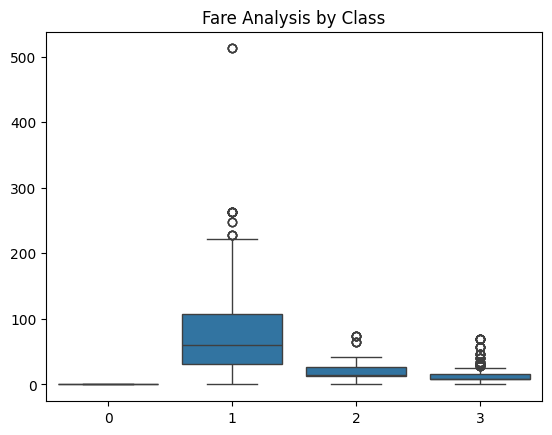

In [42]:
controller = Class_Controller()

print("Passenger demographics by class:", controller.passenger_demographics_by_class(data))
print("Survival rates by class and gender:", controller.survival_rates_by_class_and_gender(data))
controller.fare_analysis_by_class(data)


In [48]:
import numpy as np
from typing import Dict, List, Tuple


class Additonal_Controller:

    def __init__(self):
        pass

    def family_relationships_and_survival(self, arr: np.ndarray) -> Dict[int, float]:
        family_sizes = arr['sibsp'] + arr['parch'] + 1
        unique_sizes = np.unique(family_sizes)
        family_survival: Dict[int, float] = {}
        for size in unique_sizes:
            mask = family_sizes == size
            survival_rate = np.mean(arr['survived'][mask]) * 100
            family_survival[int(size)] = float(survival_rate)
        return family_survival

    def survival_rate_by_category(self, data: np.ndarray, category_col: str) -> List[Tuple[str, float]]:
        categories = np.unique(data[category_col])
        survival_rates: List[Tuple[str, float]] = []
        for category in categories:
            total_passengers = np.sum(data[category_col] == category)
            if total_passengers == 0:
                continue
            survived_passengers = np.sum((data[category_col] == category) & (data['survived'] == 1))
            survival_rate = survived_passengers / total_passengers
            survival_rates.append((str(category), float(survival_rate)))
        return survival_rates


In [50]:
controller = Additonal_Controller()

print("Family relationships and survival:", controller.family_relationships_and_survival(data))
    

Family relationships and survival: {1: 30.214917825537295, 2: 53.61702127659574, 3: 56.60377358490566, 4: 69.76744186046511, 5: 27.27272727272727, 6: 20.0, 7: 25.0, 8: 0.0, 11: 0.0}


In [51]:
print("Survival rate by category:", controller.survival_rate_by_category(data, 'sex'))


Survival rate by category: [('0', 0.0), ('female', 0.7274678111587983), ('male', 0.19098457888493475)]


In [52]:
    print("Survival rate by category:", controller.survival_rate_by_category(data, 'pclass'))


Survival rate by category: [('0', 0.0), ('1', 0.6191950464396285), ('2', 0.4296028880866426), ('3', 0.2552891396332863)]


In [53]:
    print("Survival rate by category:", controller.survival_rate_by_category(data, 'embarked'))


Survival rate by category: [('0', 0.6666666666666666), ('C', 0.5555555555555556), ('Q', 0.35772357723577236), ('S', 0.33260393873085337)]


In [54]:
    print("Survival rate by category:", controller.survival_rate_by_category(data, 'home_dest'))


Survival rate by category: [('0', 0.27079646017699116), ('?Havana, Cuba', 0.0), ('Aberdeen / Portland, OR', 1.0), ('Albany, NY', 1.0), ('Altdorf, Switzerland', 0.0), ('Amenia, ND', 0.5), ('Antwerp, Belgium / Stanton, OH', 0.0), ('Argentina', 0.0), ('Asarum, Sweden Brooklyn, NY', 0.0), ('Ascot, Berkshire / Rochester, NY', 0.0), ('Auburn, NY', 0.0), ('Aughnacliff, Co Longford, Ireland New York, NY', 0.0), ('Australia Fingal, ND', 1.0), ('Austria', 0.0), ('Austria Niagara Falls, NY', 0.0), ('Austria-Hungary', 0.0), ('Austria-Hungary / Germantown, Philadelphia, PA', 1.0), ('Bangkok, Thailand / Roseville, IL', 1.0), ('Barcelona, Spain / Havana, Cuba', 1.0), ('Barre, Co Washington, VT', 0.0), ('Basel, Switzerland', 1.0), ('Bath, England / Massachusetts', 1.0), ('Bayside, Queens, NY', 1.0), ('Belfast', 0.0), ('Belfast, NI', 0.0), ('Belgium  Montreal, PQ', 1.0), ('Belgium Detroit, MI', 1.0), ('Belmont, MA', 1.0), ('Bennington, VT', 0.0), ('Bergen, Norway', 0.0), ('Berne, Switzerland / Central 

In [55]:
    print("Survival rate by category:", controller.survival_rate_by_category(data, 'boat'))

Survival rate by category: [('0', 0.027912621359223302), ('1', 1.0), ('10', 1.0), ('11', 1.0), ('12', 0.9473684210526315), ('13', 1.0), ('13 15', 1.0), ('13 15 B', 1.0), ('14', 0.9696969696969697), ('15', 1.0), ('15 16', 1.0), ('16', 1.0), ('2', 1.0), ('3', 1.0), ('4', 1.0), ('5', 1.0), ('5 7', 1.0), ('5 9', 1.0), ('6', 1.0), ('7', 1.0), ('8', 1.0), ('8 10', 1.0), ('9', 1.0), ('A', 0.6363636363636364), ('B', 0.8888888888888888), ('C', 0.9736842105263158), ('C D', 1.0), ('D', 0.95)]
